In [18]:
import requests as r
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') 

In [19]:
moviedata = pd.read_csv('cleaned-movie-dataset.csv',index_col= 0)
moviedata

,id,title,adult,popularity,budget,revenue,vote_count,vote_average,release_date,release_year,original_language,genre,casts,keywords,recommendations,similar_movies
1,19995,Avatar,False,432.199,237000000,2920357254,28759,7.569,2009-12-15,2009,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Sam Worthington', 'Zoe Saldaña', 'Sigourney ...","['culture clash', 'future', 'space war', 'spac...","['Capturing Avatar', 'Avatar: Creating the Wor...","['The Reckless Hour', 'MicroPlanet 3D', 'If I ..."
2,299534,Avengers: Endgame,False,152.323,356000000,2799439100,22908,8.267,2019-04-24,2019,en,"['Adventure', 'Science Fiction', 'Action']","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...","['space travel', 'time travel', 'time machine'...","['Avengers: Infinity War', 'Captain Marvel', '...","['Blankman', 'Santos', 'The Masters of Time', ..."
4,76600,Avatar: The Way of Water,False,10255.685,460000000,2309660236,6285,7.740,2022-12-14,2022,en,"['Science Fiction', 'Adventure', 'Action']","['Sam Worthington', 'Zoe Saldaña', 'Sigourney ...","['loss of loved one', 'dying and death', 'alie...","['Capturing Avatar', 'Avatar: Creating the Wor...","['Cyber Ninja', 'Spenser: A Savage Place', 'Br..."
5,597,Titanic,False,137.265,200000000,2187463944,22650,7.892,1997-11-18,1997,en,"['Drama', 'Romance']","['Leonardo DiCaprio', 'Kate Winslet', 'Billy Z...","['drowning', 'evacuation', 'shipwreck', 'icebe...","['The Lion King', 'Pirates of the Caribbean: T...","['The Reckless Hour', 'The Naked Flame', 'Bell..."
6,140607,Star Wars: The Force Awakens,False,62.371,245000000,2068223624,17860,7.302,2015-12-15,2015,en,"['Adventure', 'Action', 'Science Fiction', 'Fa...","['Harrison Ford', 'Mark Hamill', 'Carrie Fishe...","['android', 'spacecraft', 'space opera']","['Star Wars: The Last Jedi', 'Star Wars: Episo...","['MicroPlanet 3D', 'Geography of the Universe'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,52239,Possessed,False,3.566,0,1522000,33,7.200,1931-11-21,1931,en,"['Drama', 'Romance']","['Joan Crawford', 'Clark Gable', 'Wallace Ford...","['factory worker', 'self sacrifice', 'lawyer',...","['Possessed', 'Queen Bee', 'King Knight', 'Ars...","['The Cocoanuts', 'The Beast of the City', 'Ha..."
9949,30666,Stepfather 2,False,6.243,1500000,1519796,77,5.400,1989-11-03,1989,en,"['Horror', 'Thriller']","[""Terry O'Quinn"", 'Meg Foster', 'Caroline Will...","['parent child relationship', 'stepfather', 's...","['The Stepfather', 'Halloween 5: The Revenge o...","['Zombie Lake', 'Mo', 'Lymelife', 'Ms .45', 'O..."
9951,381351,A Mighty Team,False,6.540,0,1515000,149,5.587,2016-03-23,2016,fr,['Comedy'],"['Medi Sadoun', 'Gérard Depardieu', 'Chantal L...","['foot', 'football (soccer)', 'football (socce...","['Fear City: A Family-Style Comedy', 'Charlie:...","['Eleven Men Against Eleven', 'Lady Football',..."
9981,366755,Fashion Chicks,False,4.509,450000,1500000,70,5.900,2015-12-02,2015,nl,['Comedy'],"['Liza Sips', 'Pip Pellens', 'Robin Martens', ...","['nerd', 'alter ego', 'fashion', 'blogger']","['Tamara', 'Crush in Jaipur', 'High Strung', '...","['Zapped!', 'Pyaar Impossible!', 'Slaughter Hi..."


In [20]:
numericalmoviedata = moviedata[["popularity","genre", "vote_count", "vote_average","release_date","release_year","original_language","casts"]]

# Categorical data
Then, let us look at some categorical data

In [35]:
categoricalmoviedata = moviedata[["original_language","genre","release_year","vote_average"]]
categoricalmoviedata

,original_language,genre,release_year,vote_average
1,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2009,7.569
2,en,"['Adventure', 'Science Fiction', 'Action']",2019,8.267
4,en,"['Science Fiction', 'Adventure', 'Action']",2022,7.740
5,en,"['Drama', 'Romance']",1997,7.892
6,en,"['Adventure', 'Action', 'Science Fiction', 'Fa...",2015,7.302
...,...,...,...,...
9946,en,"['Drama', 'Romance']",1931,7.200
9949,en,"['Horror', 'Thriller']",1989,5.400
9951,fr,['Comedy'],2016,5.587
9981,nl,['Comedy'],2015,5.900


In [36]:
categoricalmoviedata["release_year"].value_counts()


release_year
2016    285
2013    266
2017    266
2014    260
2018    258
       ... 
1916      1
1925      1
1934      1
1920      1
1924      1
Name: count, Length: 103, dtype: int64

In [40]:
# Extract the year of release from the release_date column
moviedata['year'] = pd.DatetimeIndex(moviedata['release_date']).year

# Get a list of all the years in the dataset
years = list(moviedata['year'].unique())

# Separate the years into their corresponding decades
def separate_years_by_decade(years):
    decades = {}
    for year in years:
        decade = year // 10 * 10
        if decade in decades:
            decades[decade].append(year)
        else:
            decades[decade] = [year]
    return decades

decades = separate_years_by_decade(years)

# Count the number of movies released in each decade
for decade, year_list in decades.items():
    movie_count = len(moviedata[moviedata['year'].isin(year_list)])
    print(f"{decade}s: {movie_count} movies released")


2000s: 1987 movies released
2010s: 2528 movies released
2020s: 425 movies released
1990s: 1170 movies released
1980s: 748 movies released
1970s: 250 movies released
1950s: 108 movies released
1930s: 35 movies released
1960s: 157 movies released
1940s: 67 movies released
1910s: 3 movies released
1920s: 8 movies released


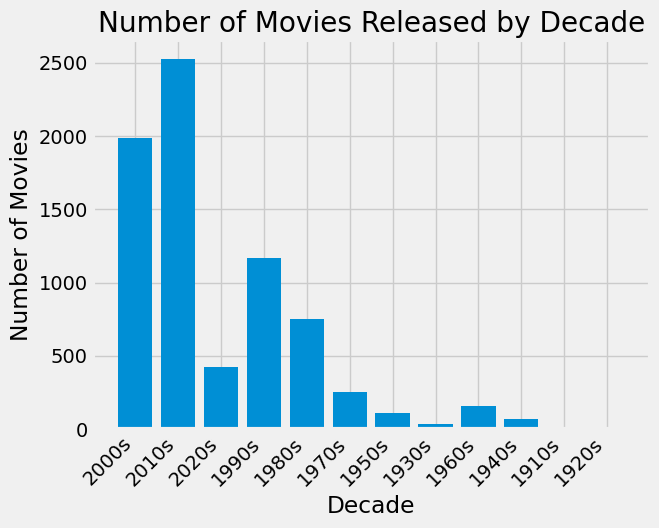

In [46]:
# Count the number of movies released in each decade
decade_counts = []
for decade, year_list in decades.items():
    movie_count = len(moviedata[moviedata['year'].isin(year_list)])
    decade_counts.append(movie_count)
    
# Create a bar chart of the number of movies released in each decade
plt.bar([str(decade) + 's' for decade in decades.keys()], decade_counts)
plt.title('Number of Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')

# Increase spacing between axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

In [47]:
categoricalmoviedata["original_language"].value_counts()


original_language
en    6115
ja     251
fr     249
hi     137
es     112
ko     110
it      89
zh      77
de      72
ru      59
cn      51
ta      24
tr      16
sv      15
da      13
no      12
te      11
pt      10
th      10
ml       9
ar       8
pl       8
nl       3
cs       3
fi       3
id       2
uk       2
fa       2
tl       2
kn       2
he       1
el       1
vi       1
nb       1
is       1
la       1
ro       1
hu       1
ga       1
Name: count, dtype: int64

In [48]:
morelanguage = categoricalmoviedata[categoricalmoviedata["original_language"].isin(["en","hi","fr","ru","es","ta","ml","ja","ko","zh","it","te","de"])]


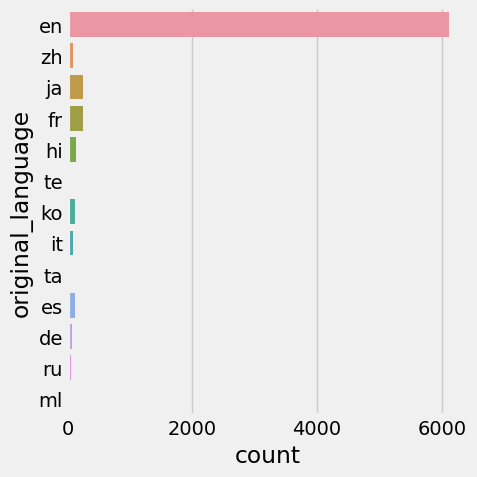

In [49]:
sb.catplot(y = "original_language", data = morelanguage, kind = "count")


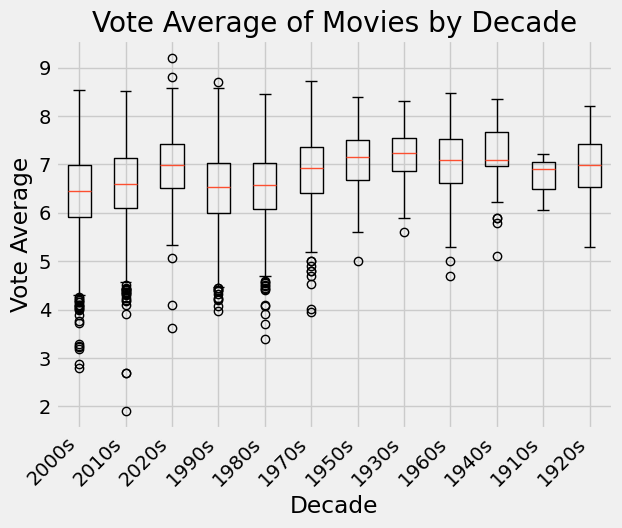

In [58]:
#Let us see these categorical variables against vote average,

# Create a list of the average vote for movies in each decade
decade_vote_averages = []
for decade, year_list in decades.items():
    vote_average = moviedata[moviedata['year'].isin(year_list)]['vote_average'].mean()
    decade_vote_averages.append(vote_average)

# Create a box plot of the vote averages by decade
plt.boxplot([moviedata[moviedata['year'].isin(decades[decade])]['vote_average'] for decade in decades])

# Add labels and title
plt.xticks(range(1, len(decades)+1), [str(decade) + 's' for decade in decades.keys()], rotation=45, ha='right')
plt.xlabel('Decade')
plt.ylabel('Vote Average')
plt.title('Vote Average of Movies by Decade')

plt.show()

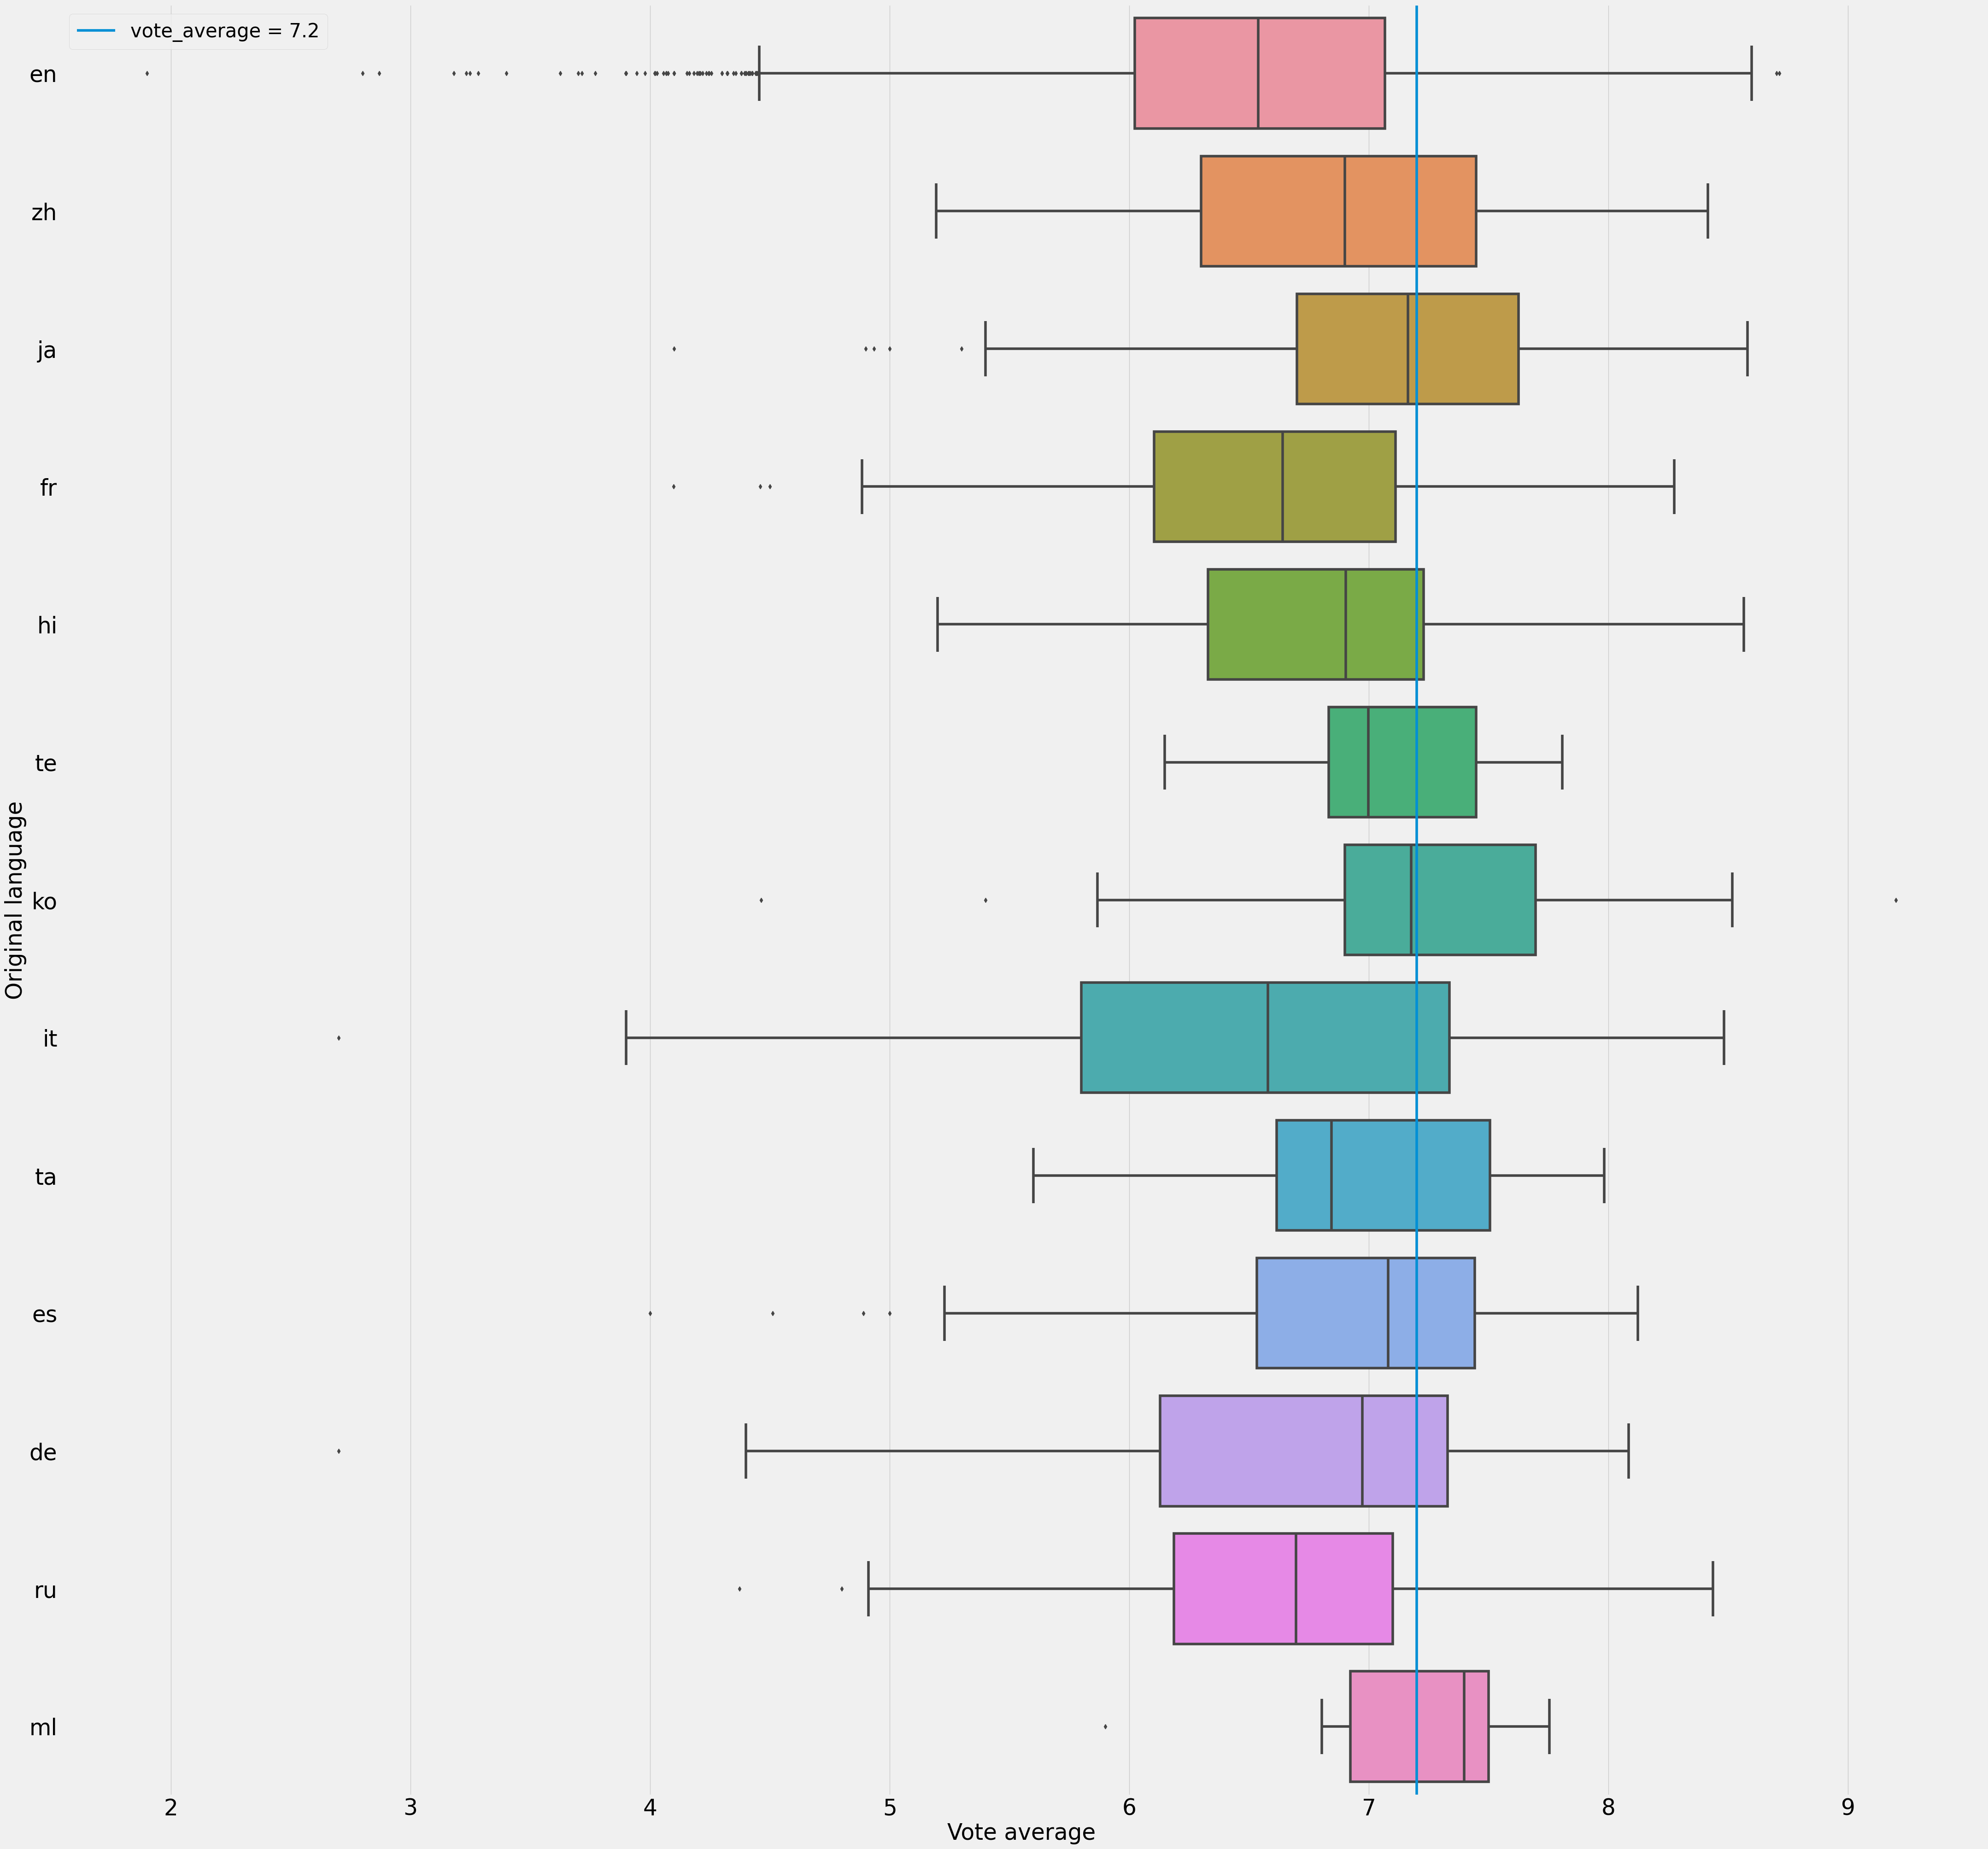

In [53]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "vote_average", y = "original_language", data = morelanguage, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xlabel("Vote average",fontsize=35)
ax.set_ylabel("Original language",fontsize=35)
plt.axvline(7.2, label= "vote_average = 7.2")
plt.legend(fontsize=30)
plt.show()

In [59]:
API_KEY = '7884759e98354ed855458b12c5c2bcdc'


In [60]:
genrelists = r.get(f"https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}&language=en-US")
genrelist = genrelists.json()['genres']
ids = {}
for i in genrelist:
    ids[i['name']] = 0
print("List of genres: ", list(ids.keys()))

List of genres:  ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [62]:
from ast import literal_eval
for eachmovie in categoricalmoviedata["genre"]:
    try:
        eachmovie = literal_eval(eachmovie)
    except:
        continue
    for index in range(len(eachmovie)):
        ids[eachmovie[index]] += 1

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Documentary'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'History'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Music'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Science Fiction'),
  Text(15, 0, 'TV Movie'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

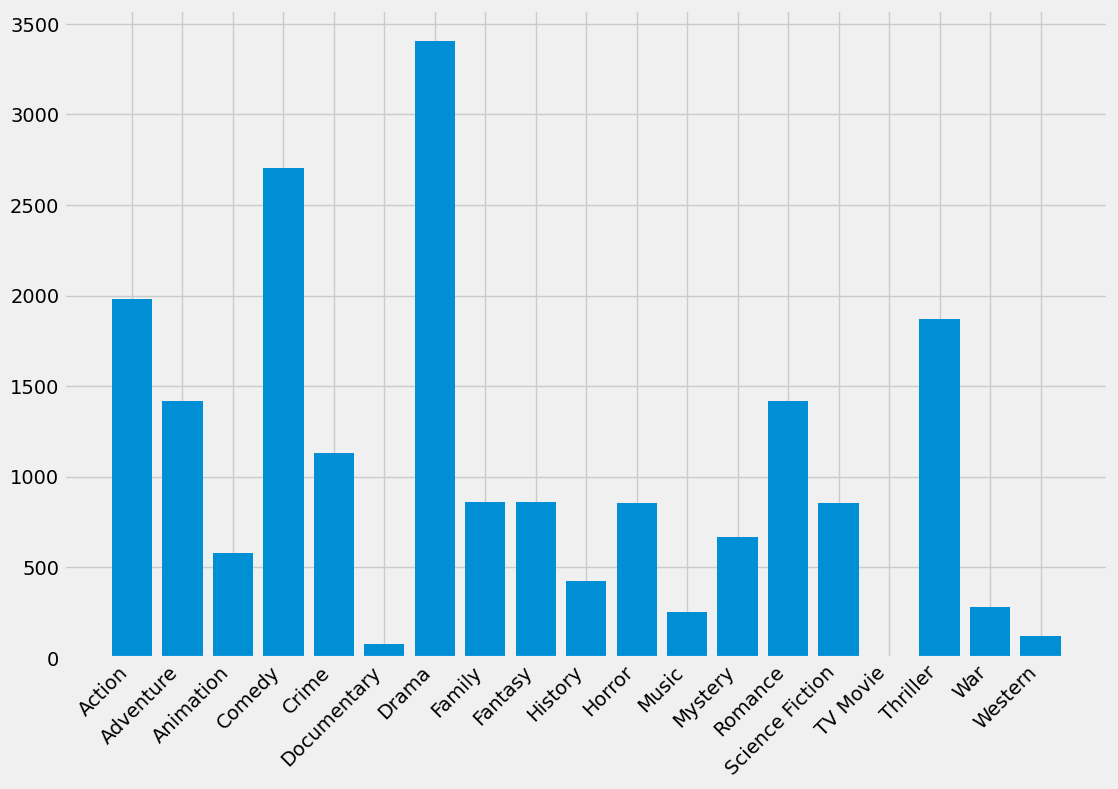

In [64]:
f,ax = plt.subplots(figsize=(12,8))
plt.bar(ids.keys(),ids.values())
plt.xticks(rotation = 45, ha = 'right')

In [65]:
firstgenre = []
for eachmovie in categoricalmoviedata["genre"]:
    try:
        eachmovie = literal_eval(eachmovie)
        firstgenre.append(eachmovie[0])
    except:
        firstgenre.append(np.nan)
withfirstgenre = categoricalmoviedata.copy()
withfirstgenre["first_genre"] = firstgenre

In [66]:
withfirstgenre

,original_language,genre,release_year,vote_average,first_genre
1,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2009,7.569,Action
2,en,"['Adventure', 'Science Fiction', 'Action']",2019,8.267,Adventure
4,en,"['Science Fiction', 'Adventure', 'Action']",2022,7.740,Science Fiction
5,en,"['Drama', 'Romance']",1997,7.892,Drama
6,en,"['Adventure', 'Action', 'Science Fiction', 'Fa...",2015,7.302,Adventure
...,...,...,...,...,...
9946,en,"['Drama', 'Romance']",1931,7.200,Drama
9949,en,"['Horror', 'Thriller']",1989,5.400,Horror
9951,fr,['Comedy'],2016,5.587,Comedy
9981,nl,['Comedy'],2015,5.900,Comedy


In [67]:
withfirstgenre["first_genre"].value_counts()


first_genre
Drama              1635
Comedy             1569
Action             1178
Horror              515
Adventure           495
Crime               325
Animation           318
Thriller            315
Romance             211
Fantasy             198
Science Fiction     179
Family              177
Mystery              89
War                  66
Music                58
Western              57
Documentary          55
History              45
TV Movie              1
Name: count, dtype: int64

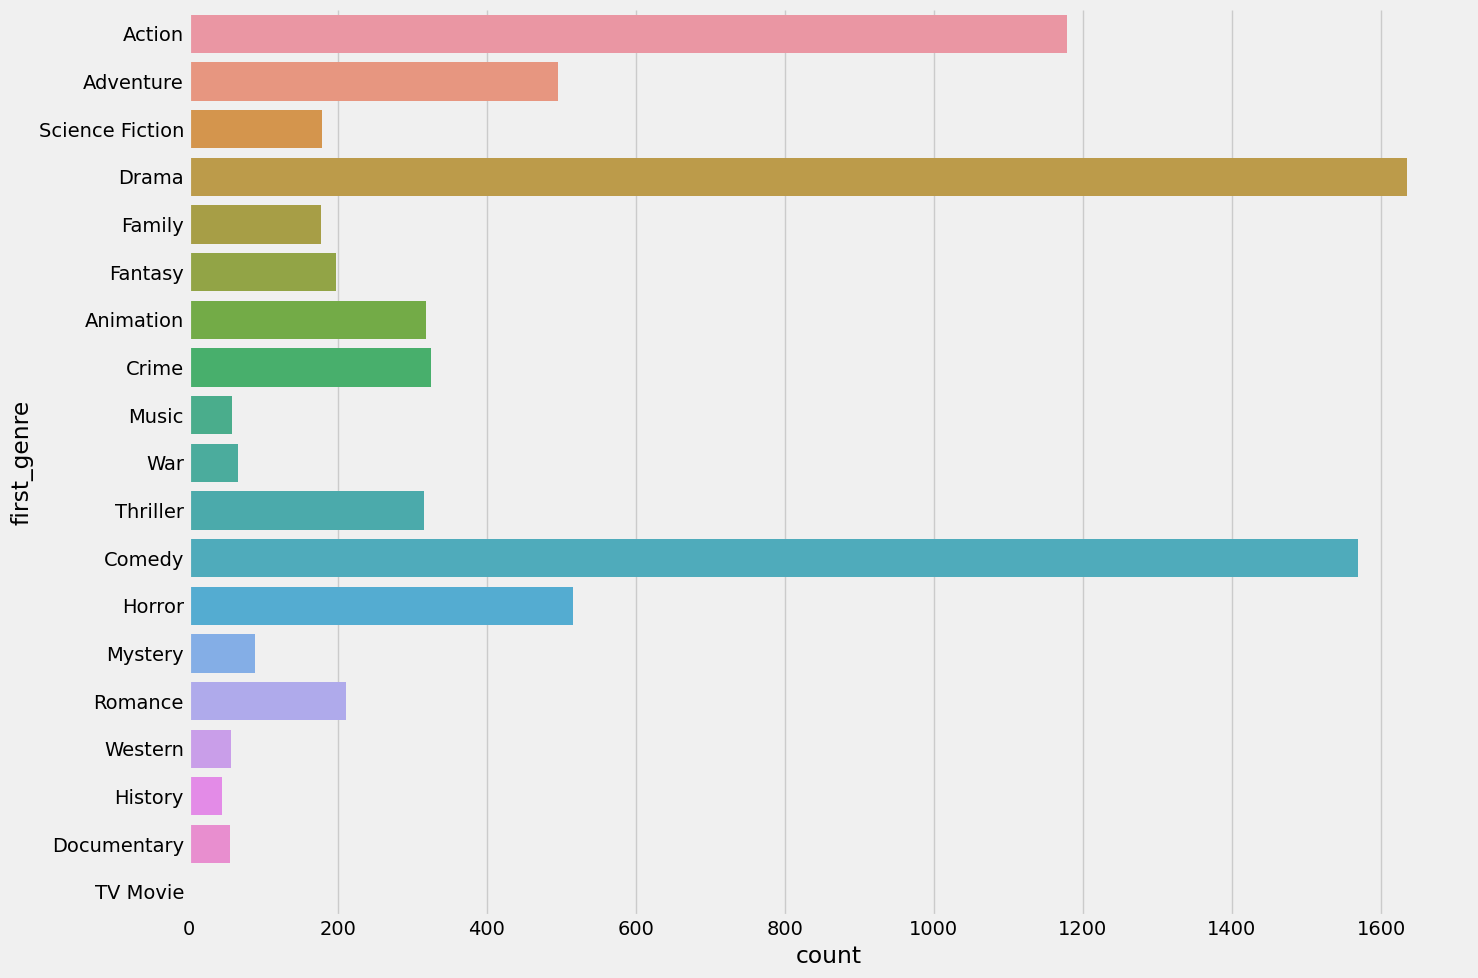

In [68]:
sb.catplot(y = "first_genre", data = withfirstgenre, kind = "count", height= 10, aspect= 1.5)


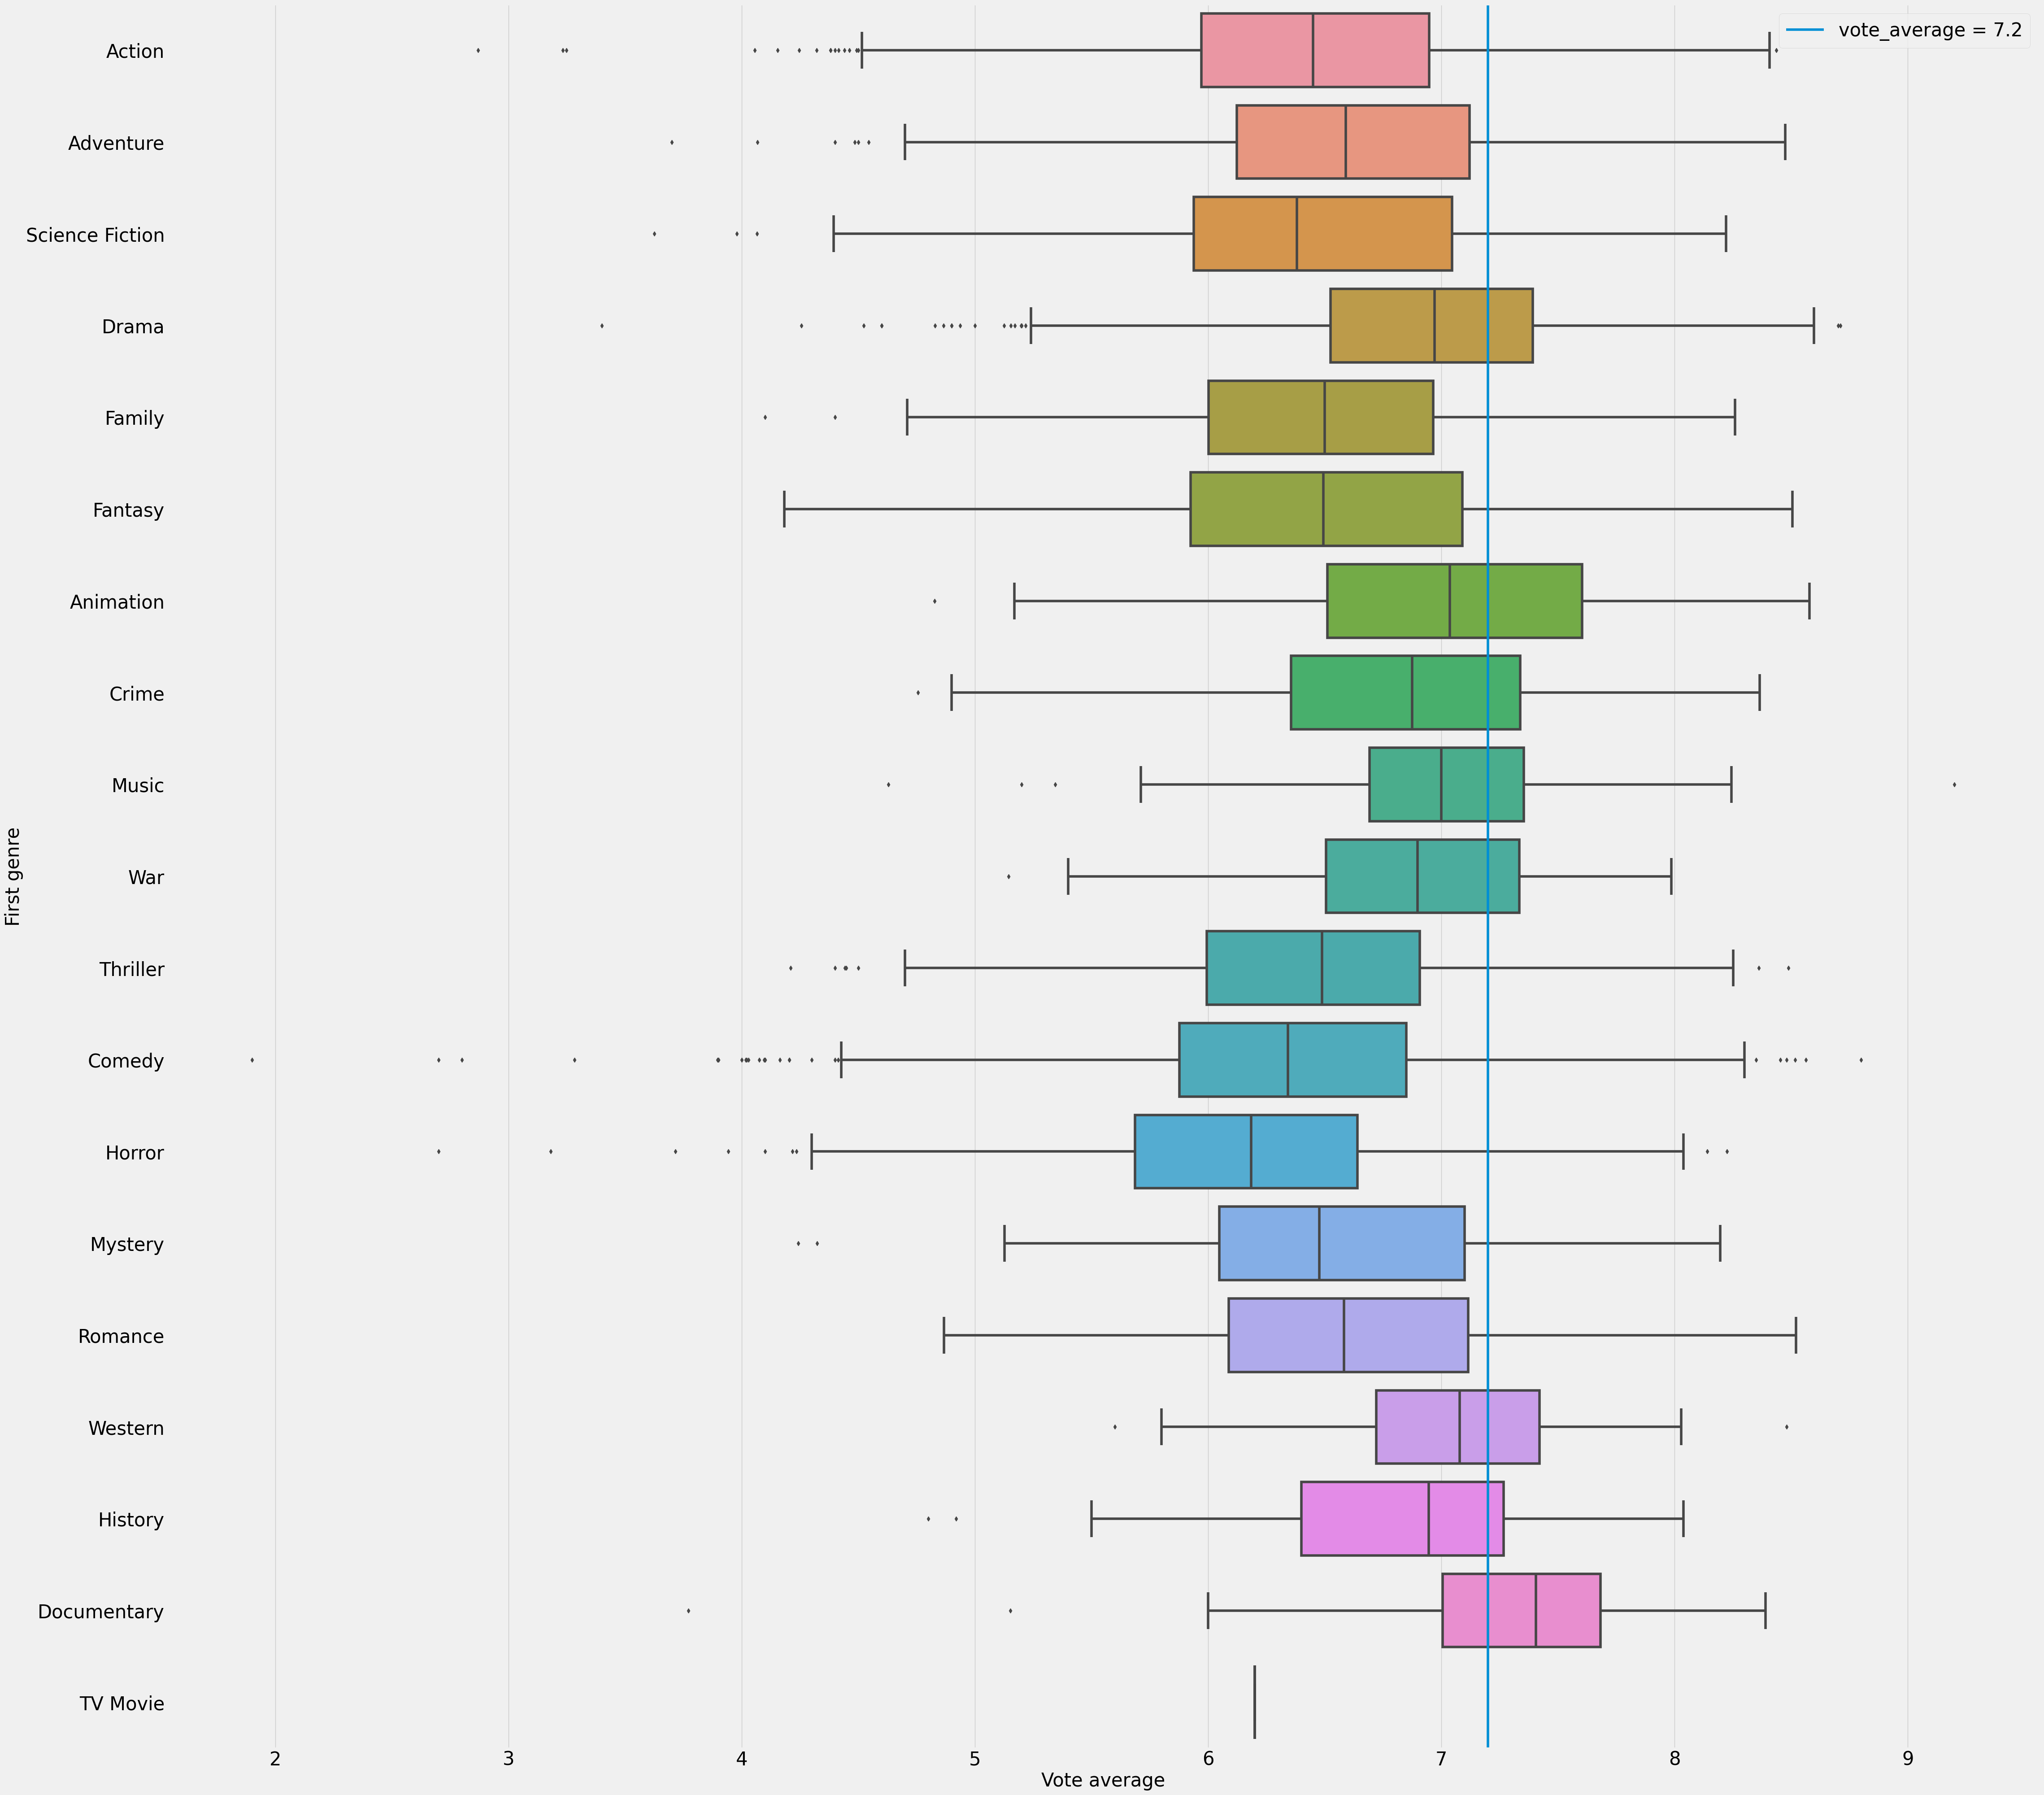

In [69]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "vote_average", y = "first_genre", data = withfirstgenre, orient = "h")
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("Vote average",fontsize=30)
ax.set_ylabel("First genre",fontsize=30)
plt.axvline(7.2, label= "vote_average = 7.2")
plt.legend(fontsize=30)
plt.show()